In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from ODE_SOLVER import RungeKutta4 # for this import to work - make sure the file ODE_SOLVER is in the same file as your jupyter notebook
from scipy.integrate import solve_ivp

This program is based on the literature **"Sniffers, buzzers, toggles and blinkers: dynamics of regulatoryand signaling pathways in the cell" (Tyson 2002)** 

Implemented model 2b) Activator inhibitor <br>
$$
\begin{align}
\frac{dR}{dt} =& k_0 \cdot E_p(R) + k_1\cdot S - k_2 \cdot R - k^{\prime}_2\cdot X \cdot R \tag{1}\\
\frac{dX}{dt} =& k_5 \cdot R - k_6 \cdot X \tag{2}\\
E_p(R) =& G(k_3 \cdot R, k_4, J_3, J_4 \tag{3})\\
\end{align}
$$
Where G is defined as:
$$
\begin{align}
G(u, v, J, K) = \frac{2 \cdot u \cdot K}{v - u + v \cdot J + u \cdot K + \sqrt{(v-u+v\cdot J + u \cdot K)^2-4(v - u) \cdot u \cdot K}} \tag{4}
\end{align}
$$

**Parameter values** <br>
$k_0 = 4, k_1=k_2=k^{\prime}=k_3=k_4=1, k_5 = 0.1, k=6 = 0.075, J_3 = J_4 = 0.3$

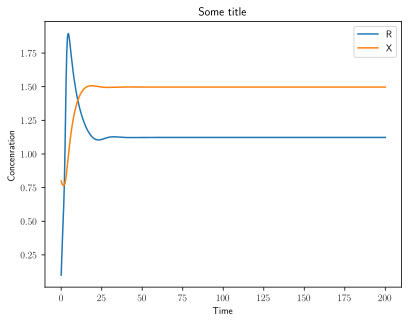

In [5]:
def CAMP_PDEP(x, t):
    def G(u, v, J, K): # equation (4)
        numerator = 2 * u * K # numerator of the fraction
        den_1 = v - u + v * J + u * K # first part of the denominator
        den_2 = -4 * (v - u) * u * K # second part of the denominator
        radicand = den_1**2 + den_2 # expression under the square root
        denominator = den_1 + np.sqrt(radicand) # compute the entire denominator
        return numerator / denominator # compute and return the fraction

    R = x[0] 
    X = x[1]

    EP = G(k3*R, k4, J3, J4) # equation (3) 


    dRdT = k0*EP + k1*S - k2 * R - k2_p * X * R # equation (1)
    dXdT = (k5*R) - (k6*X) # equation (2)
    return [dRdT, dXdT]


# parameters taken from Tyson (2002)
k0 = 4
k1, k2, k2_p, k3, k4 = 1, 1, 1, 1, 1
k5 = 0.1
k6 = 0.075
J3, J4 = 0.3, 0.3
S = 0.5


x0 = [0.1, 0.8] # initial conditions
solver = RungeKutta4(CAMP_PDEP)
solver.set_initial_condition(x0)
time_points = np.linspace(0, 200, 1000)
x, t = solver.solve(time_points)
R = x[:,0]; X = x[:,1]
plt.title("Some title")
plt.plot(t, R, label='R')
plt.plot(t, X, label='X')
plt.xlabel('Time')
plt.ylabel('Concenration')
plt.legend()

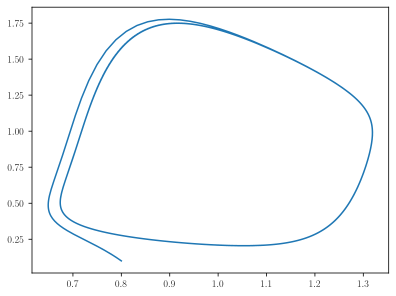

In [4]:
plt.plot(X, R)